Вы получили основные навыки обработки данных, теперь пора испытать их на практике. Сейчас вам предстоит заняться задачей классификации.

Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Понимать суть работы "леса" не обязательно на данном этапе, но качество предсказаний будет выше, чем с линейным классификатором. (если желаете, вот гайд https://adataanalyst.com/scikit-learn/linear-classification-method/)

Желаю успеха :)

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

In [291]:
data = pd.read_csv('data\shelter_outcomes.csv')
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [292]:
#pip install --user pandas_profiling

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
age_upon_outcome    78248 non-null object
animal_id           78256 non-null object
animal_type         78256 non-null object
breed               78256 non-null object
color               78256 non-null object
date_of_birth       78256 non-null object
datetime            78256 non-null object
monthyear           78256 non-null object
name                54370 non-null object
outcome_subtype     35963 non-null object
outcome_type        78244 non-null object
sex_upon_outcome    78254 non-null object
dtypes: object(12)
memory usage: 7.2+ MB


In [294]:
data.describe().transpose()

,count,unique,top,freq
age_upon_outcome,78248,46,1 year,14355
animal_id,78256,70855,A718223,11
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
monthyear,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660


In [295]:
#data.outcome_type.unique()

In [296]:
#оставим только метки которые нужно предсказывать  'Adoption' и 'Transfer' 

In [297]:
#плохая идея
#list_filter = ['Adoption','Transfer']
#data = data[data.outcome_type.isin(list_filter)]
#data.info()

In [298]:
data.describe().transpose()

,count,unique,top,freq
age_upon_outcome,78248,46,1 year,14355
animal_id,78256,70855,A718223,11
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
monthyear,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660


In [299]:
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


age_upon_outcome - возраст животного на момент целевой функции. не нужно посчитаем
animal_id - id животного точно не нужно
animal_type - тип животного. точно оставляем
breed - порода, оставляем
color - цвет, оставляем
date_of_birth - дата рождения, оставляем
datetime - дата резульата целевой функции, оставляем
monthyear = datetime - убираем
name - имя, убираем
outcome_subtype - субтип резульатат. ?? заполнение 50%. уберу
sex_upon_outcome - пол, 5 вариаций...


outcome_type - результат, он же целевая функция

In [300]:
data = data[['animal_type','breed','color','date_of_birth','datetime','sex_upon_outcome','outcome_type']]
data.head()

,animal_type,breed,color,date_of_birth,datetime,sex_upon_outcome,outcome_type
0,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Intact Male,Transfer
1,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Spayed Female,Transfer
2,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,Neutered Male,Adoption
3,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Neutered Male,Transfer
4,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Unknown,Euthanasia


In [301]:
#предразуем даты в даты. уберем время
data['date_birth'] = pd.to_datetime(data.date_of_birth, format = "%Y/%m/%d")
data['date'] = pd.to_datetime(data.datetime, format = "%Y/%m/%d")
data['date'] = [data.to_datetime().date() for data in data.date]
data['date'] = pd.to_datetime(data.date, format = "%Y/%m/%d")
data['date_birth'] = [data.to_datetime().date() for data in data.date_birth]
data['date_birth'] = pd.to_datetime(data.date_birth, format = "%Y/%m/%d")

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  after removing the cwd from sys.path.
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  


In [302]:
#посчитаем возраст животного на момент события в годах
data['age'] = data.date - data.date_birth
data['age'] = data['age']/np.timedelta64(1,'D')/365

In [303]:
data.head()

,animal_type,breed,color,date_of_birth,datetime,sex_upon_outcome,outcome_type,date_birth,date,age
0,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Intact Male,Transfer,2014-07-07,2014-07-22,0.041096
1,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Spayed Female,Transfer,2012-11-06,2013-11-07,1.002740
2,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,Neutered Male,Adoption,2013-03-31,2014-06-03,1.175342
3,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Neutered Male,Transfer,2005-06-02,2014-06-15,9.041096
4,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Unknown,Euthanasia,2014-01-07,2014-07-07,0.495890


In [304]:
#уберем даты
data = data[['animal_type','breed','color','age','sex_upon_outcome','outcome_type']]
data.head()

,animal_type,breed,color,age,sex_upon_outcome,outcome_type
0,Cat,Domestic Shorthair Mix,Orange Tabby,0.041096,Intact Male,Transfer
1,Dog,Beagle Mix,White/Brown,1.002740,Spayed Female,Transfer
2,Dog,Pit Bull,Blue/White,1.175342,Neutered Male,Adoption
3,Dog,Miniature Schnauzer Mix,White,9.041096,Neutered Male,Transfer
4,Other,Bat Mix,Brown,0.495890,Unknown,Euthanasia


In [305]:
data.animal_type.unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

In [306]:
dict_animal = {'Cat':1,
       'Dog': 2,
       'Bird':3,
       'Livestock':4,
       'Other':5
      }

In [307]:
data['a_type'] = data.animal_type.replace(dict_animal)
data = data[['a_type','breed','color','age','sex_upon_outcome','outcome_type']]

In [308]:
data.head()

,a_type,breed,color,age,sex_upon_outcome,outcome_type
0,1,Domestic Shorthair Mix,Orange Tabby,0.041096,Intact Male,Transfer
1,2,Beagle Mix,White/Brown,1.002740,Spayed Female,Transfer
2,2,Pit Bull,Blue/White,1.175342,Neutered Male,Adoption
3,2,Miniature Schnauzer Mix,White,9.041096,Neutered Male,Transfer
4,5,Bat Mix,Brown,0.495890,Unknown,Euthanasia


In [309]:
#генерим словарь для пароды
list_breed = list(data.breed.unique())
list_breed_len = list(range(0,len(list_breed)))

dict_breed = dict(zip(list_breed,list_breed_len))

#Тут по хорошему как то нужно уменьшать кол-во признаков - к примеру через парсинг только имени пароды, без каких то деталей доп

In [310]:
#переводим данные пароды в число
data['breed_type'] = data.breed.replace(dict_breed)
data = data[['a_type','breed_type','color','age','sex_upon_outcome','outcome_type']]

In [311]:
data.head()

,a_type,breed_type,color,age,sex_upon_outcome,outcome_type
0,1,0,Orange Tabby,0.041096,Intact Male,Transfer
1,2,1,White/Brown,1.002740,Spayed Female,Transfer
2,2,2,Blue/White,1.175342,Neutered Male,Adoption
3,2,3,White,9.041096,Neutered Male,Transfer
4,5,4,Brown,0.495890,Unknown,Euthanasia


In [312]:
#генерим словарь для цвета
list_color = list(data.color.unique())
list_color_len = list(range(0,len(list_color)))

dict_color = dict(zip(list_color,list_color_len))

In [314]:

#переводим данные цвета в число
data['color_type'] = data.color.replace(dict_color)
data = data[['a_type','breed_type','color_type','age','sex_upon_outcome','outcome_type']]
data.head()

,a_type,breed_type,color_type,age,sex_upon_outcome,outcome_type
0,1,0,0,0.041096,Intact Male,Transfer
1,2,1,1,1.002740,Spayed Female,Transfer
2,2,2,2,1.175342,Neutered Male,Adoption
3,2,3,3,9.041096,Neutered Male,Transfer
4,5,4,4,0.495890,Unknown,Euthanasia


In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 6 columns):
a_type              78256 non-null int64
breed_type          78256 non-null int64
color_type          78256 non-null int64
age                 78256 non-null float64
sex_upon_outcome    78254 non-null object
outcome_type        78244 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 3.6+ MB


In [319]:
#дропнем NA значения их всего 13 штук
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 6 columns):
a_type              78243 non-null int64
breed_type          78243 non-null int64
color_type          78243 non-null int64
age                 78243 non-null float64
sex_upon_outcome    78243 non-null object
outcome_type        78243 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 4.2+ MB


In [323]:
#генерим словарь для пола
list_sex = list(data.sex_upon_outcome.unique())
list_sex_len = list(range(0,len(list_sex)))

dict_sex = dict(zip(list_sex,list_sex_len))
#Странный пол =)) 'Unknown'
dict_sex

{'Intact Female': 4,
 'Intact Male': 0,
 'Neutered Male': 2,
 'Spayed Female': 1,
 'Unknown': 3}

In [325]:
#переводим данные пола в число
data['sex_type'] = data.sex_upon_outcome.replace(dict_sex)
data = data[['a_type','breed_type','color_type','age','sex_type','outcome_type']]
data.head()

,a_type,breed_type,color_type,age,sex_type,outcome_type
0,1,0,0,0.041096,0,Transfer
1,2,1,1,1.002740,1,Transfer
2,2,2,2,1.175342,2,Adoption
3,2,3,3,9.041096,2,Transfer
4,5,4,4,0.495890,3,Euthanasia


In [326]:
#генерим словарь для результата
list_outcome = list(data.outcome_type.unique())
list_outcome_len = list(range(0,len(list_outcome)))

dict_outcome = dict(zip(list_outcome,list_outcome_len))

dict_outcome

{'Adoption': 1,
 'Died': 4,
 'Disposal': 5,
 'Euthanasia': 2,
 'Missing': 7,
 'Relocate': 6,
 'Return to Owner': 3,
 'Rto-Adopt': 8,
 'Transfer': 0}

In [328]:
#переводим данные результата в число
data['outcome'] = data.outcome_type.replace(dict_outcome)
data = data[['a_type','breed_type','color_type','age','sex_type','outcome']]
data.head()
# 0 и 1 - наша цель

,a_type,breed_type,color_type,age,sex_type,outcome
0,1,0,0,0.041096,0,0
1,2,1,1,1.002740,1,0
2,2,2,2,1.175342,2,1
3,2,3,3,9.041096,2,0
4,5,4,4,0.495890,3,2


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 6 columns):
a_type        78243 non-null int64
breed_type    78243 non-null int64
color_type    78243 non-null int64
age           78243 non-null float64
sex_type      78243 non-null int64
outcome       78243 non-null int64
dtypes: float64(1), int64(5)
memory usage: 6.7 MB


In [332]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
a_type,78243.0,1.791227,0.908471,1.000000,1.000000,2.000000,2.00000,5.000000
breed_type,78243.0,117.923763,286.237353,0.000000,0.000000,14.000000,78.00000,2127.000000
color_type,78243.0,31.178010,49.129122,0.000000,9.000000,12.000000,38.00000,524.000000
age,78243.0,2.238495,2.950941,-0.336986,0.260274,1.016438,3.00274,25.032877
sex_type,78243.0,1.751454,1.140024,0.000000,1.000000,2.000000,2.00000,4.000000
outcome,78243.0,1.203993,1.153872,0.000000,0.000000,1.000000,2.00000,8.000000


In [335]:
#8 строки с возрастом меньше 0 - уберем их
data[data['age']<0]

,a_type,breed_type,color_type,age,sex_type,outcome
19814,2,12,9,-0.336986,1,0
22804,2,23,9,-0.254795,2,1
45764,1,0,112,-0.027397,4,1
46565,1,0,0,-0.136986,4,2
47054,2,12,10,-0.008219,2,3
50533,1,0,57,-0.002740,3,0
52977,1,0,0,-0.065753,0,0
64745,1,0,10,-0.265753,1,1


In [336]:
data = data[data['age']!=0]

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78157 entries, 0 to 78255
Data columns (total 6 columns):
a_type        78157 non-null int64
breed_type    78157 non-null int64
color_type    78157 non-null int64
age           78157 non-null float64
sex_type      78157 non-null int64
outcome       78157 non-null int64
dtypes: float64(1), int64(5)
memory usage: 6.7 MB


In [345]:
#странные животные с не понятным полом. значений досаточно много и по разным животным. Оставляем.
data[data['sex_type'] == 3].groupby(data['a_type']).count() #'Unknown': 3

,a_type,breed_type,color_type,age,sex_type,outcome
a_type,,,,,,
1,2493,2493,2493,2493,2493,2493
2,223,223,223,223,223,223
3,194,194,194,194,194,194
4,2,2,2,2,2,2
5,3596,3596,3596,3596,3596,3596


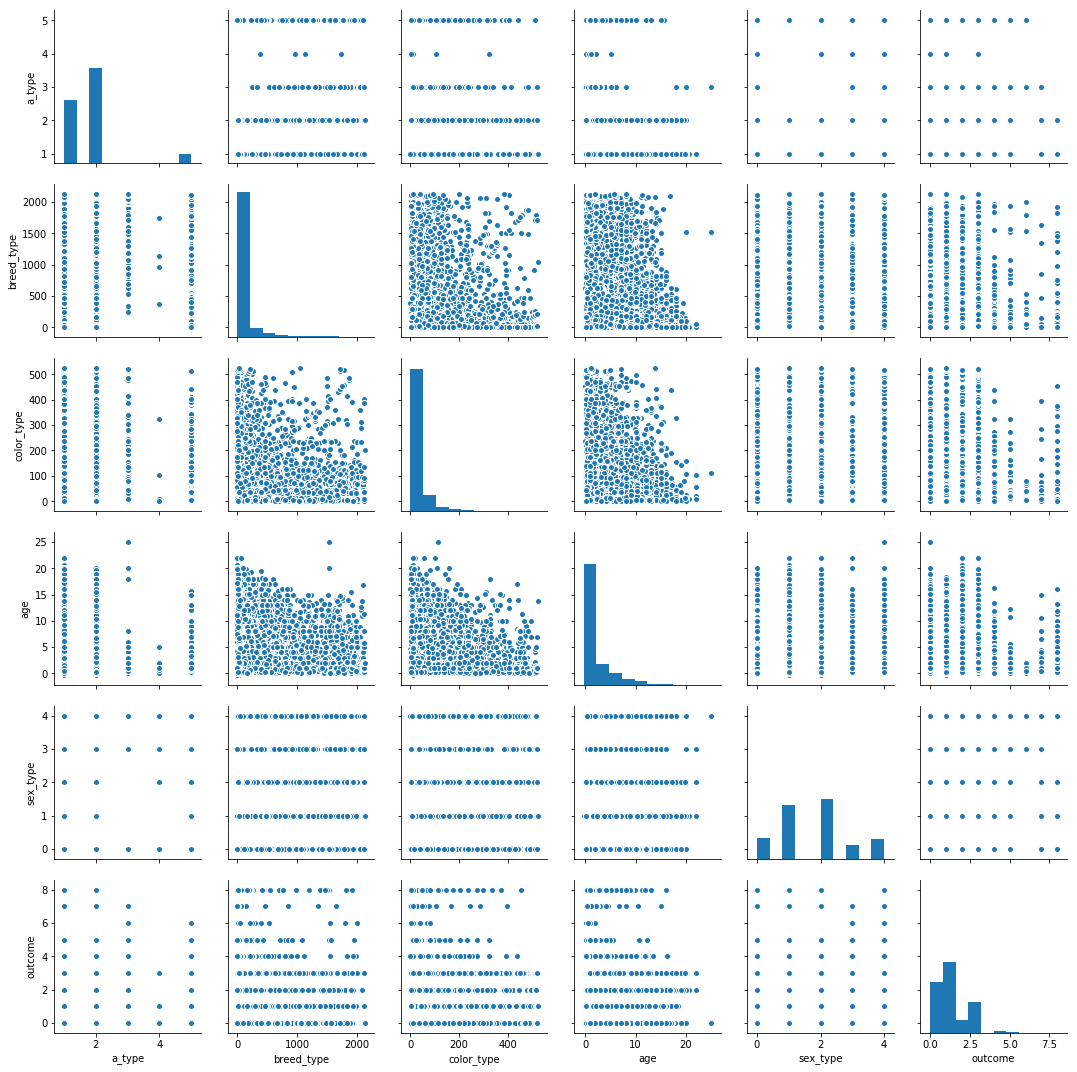

In [346]:
sns.pairplot(data)
#посмотрим распределеяния

In [347]:
#по факту почти весь дата сет категориальный.Да, как и писал выше тут конечно похоже нужен лес решений

In [ ]:
# по хорошему бы что нить сделать с плтицами, со скотом и прочими. Их реально не много по факту - всего 5%
#или вообще убрать
# Думаю правельнее перевернуть - ван хот ин кодинг

In [353]:
data[data['a_type'].isin([3,4,5])].a_type.count()/data.a_type.count()

0.05851043412618192

In [ ]:
#глянем кореляцию

In [358]:
corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient()

,a_type,breed_type,color_type,age,sex_type,outcome
a_type,1,0.17,0.01,0.05,0.14,0.28
breed_type,0.17,1,0.08,0.07,-0.02,0.06
color_type,0.01,0.08,1,0.02,0.01,0.01
age,0.05,0.07,0.02,1,-0.07,0.26
sex_type,0.14,-0.02,0.01,-0.07,1,-0.05
outcome,0.28,0.06,0.01,0.26,-0.05,1


In [359]:
#Возраст и тип животного значему для целевой функции

In [ ]:
#но сначала пойдем в лоб =)

In [356]:
data.outcome.describe()

count    78157.000000
mean         1.204908
std          1.153711
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: outcome, dtype: float64

In [355]:
from sklearn.metrics import mean_absolute_error

X = data[['a_type', 'breed_type', 'color_type', 'age', 'sex_type']]
y = data[['outcome']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 3.54073076e-01 -1.73635942e-05 -2.80837586e-05  9.31430689e-02
  -6.99915162e-02]]
Bias: [0.48745687]
Error: 0.8044187708628472


In [357]:
#ошибка 0.8, при среднем 1.2 - это прям очень больно.

In [360]:
#прогоним только значемые признаки

In [363]:
X = data[['a_type', 'age']]
y = data[['outcome']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[0.34016292 0.09504736]]
Bias: [0.38266691]
Error: 0.8085394991235372


In [364]:
#Стало даже хуже...

In [366]:
#посмотрим распределение по сушественным признакам

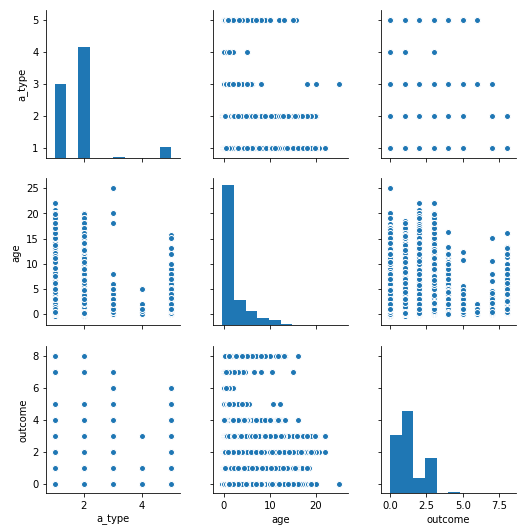

In [365]:
sns.pairplot(data[['a_type', 'age','outcome']])

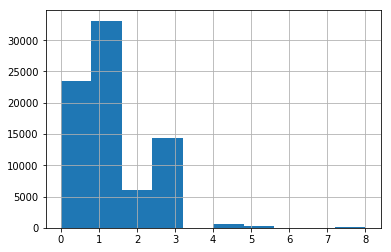

In [367]:
data.outcome.hist()

In [368]:
#Свыше 3 это вообще вырасы. Посмотрим сколько их

In [370]:
data[data['outcome']>3]

,a_type,breed_type,color_type,age,sex_type,outcome
38,1,8,0,3.093151,2,4
273,1,0,21,0.098630,4,4
423,1,0,47,0.095890,0,4
433,5,4,4,0.501370,3,5
554,1,0,9,3.010959,0,4
596,5,4,4,0.509589,3,5
599,1,0,12,0.167123,0,4
648,1,0,2,0.128767,4,4
676,5,33,10,2.005479,3,6
715,2,53,24,0.071233,0,4


In [371]:
#размер позволяет их выкинуть


In [372]:
data = data[data['outcome']<4]

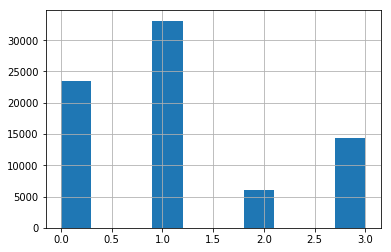

In [373]:
data.outcome.hist()

In [375]:
#стало красивее
dict_outcome
#Наши целевые это 0 и 1
#нуно будет проверить а 2 и 3 сопоставимы вооще
#может вообще строить отдельные модели для каждого из этих вариантов, а уже потом как то выбирать из них...

{'Adoption': 1,
 'Died': 4,
 'Disposal': 5,
 'Euthanasia': 2,
 'Missing': 7,
 'Relocate': 6,
 'Return to Owner': 3,
 'Rto-Adopt': 8,
 'Transfer': 0}

In [377]:
X = data[['a_type', 'age']]
y = data[['outcome']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[0.30149885 0.09884173]]
Bias: [0.38902485]
Error: 0.7461430469942717


In [378]:
#ошибка стала лучше. Но все равно больно

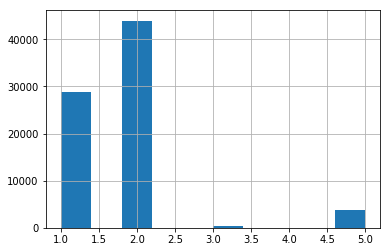

In [376]:
data.a_type.hist()

In [379]:
dict_animal

{'Bird': 3, 'Cat': 1, 'Dog': 2, 'Livestock': 4, 'Other': 5}

In [380]:
#тут сделаю ван хот ин кодинг. ПОсмотрим что будет тогда

In [382]:
data.shape

(76962, 6)

In [383]:
data_oh = data

In [384]:
from sklearn import preprocessing

In [385]:
a_type = data_oh['a_type'].get_values().reshape(-1, 1)

In [390]:
colums_a_type = ['Cat','Dog','Bird','Livestock','Other']

In [391]:
# One-hot encoding
oh_encoder = preprocessing.OneHotEncoder()
oh_encoder.fit(a_type)
oh_result = oh_encoder.transform(a_type).toarray()
oh_result

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [392]:
a_type_df = pd.DataFrame(oh_result, columns=colums_a_type)
a_type_df.index = data_oh.index

In [393]:
data_a_type = pd.concat([data_oh, a_type_df], axis=1)
data_a_type = data_a_type.drop(['a_type'], axis=1)
data_a_type.head(5)

,breed_type,color_type,age,sex_type,outcome,Cat,Dog,Bird,Livestock,Other
0,0,0,0.041096,0,0,1.0,0.0,0.0,0.0,0.0
1,1,1,1.002740,1,0,0.0,1.0,0.0,0.0,0.0
2,2,2,1.175342,2,1,0.0,1.0,0.0,0.0,0.0
3,3,3,9.041096,2,0,0.0,1.0,0.0,0.0,0.0
4,4,4,0.495890,3,2,0.0,0.0,0.0,0.0,1.0


In [395]:
data_a_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76962 entries, 0 to 78255
Data columns (total 10 columns):
breed_type    76962 non-null int64
color_type    76962 non-null int64
age           76962 non-null float64
sex_type      76962 non-null int64
outcome       76962 non-null int64
Cat           76962 non-null float64
Dog           76962 non-null float64
Bird          76962 non-null float64
Livestock     76962 non-null float64
Other         76962 non-null float64
dtypes: float64(6), int64(4)
memory usage: 9.0 MB


In [ ]:
#попробуйем так.

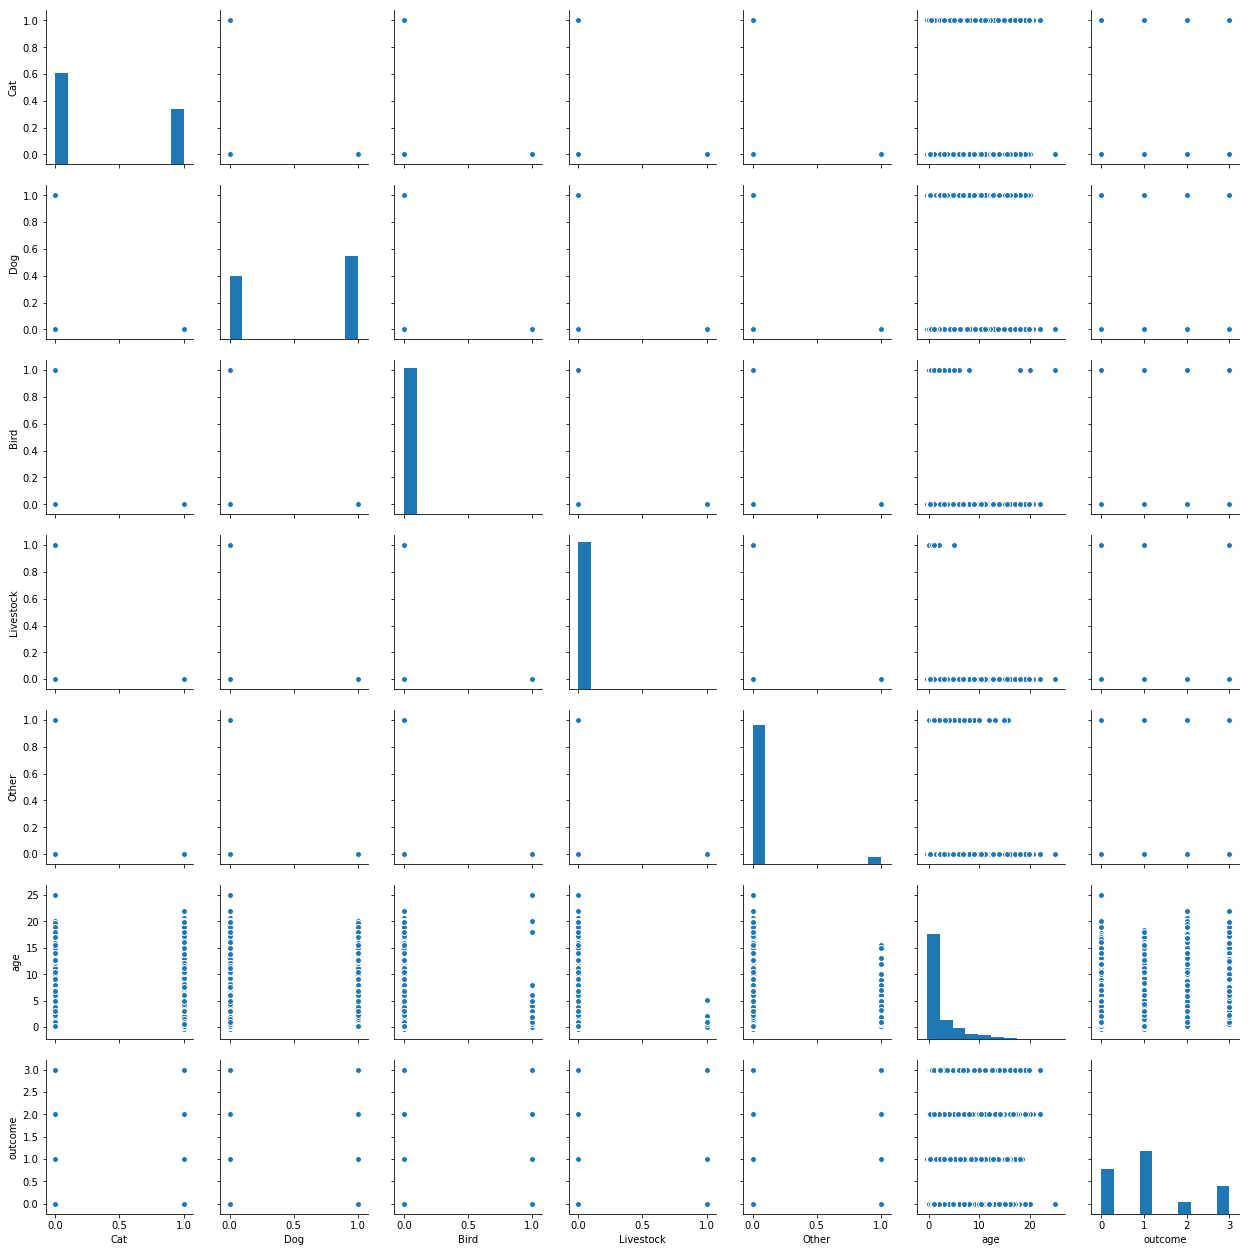

In [398]:
sns.pairplot(data_a_type[['Cat','Dog','Bird','Livestock','Other', 'age','outcome']])

In [399]:
X = data_a_type[['Cat','Dog','Bird','Livestock','Other', 'age']]
y = data_a_type[['outcome']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-4.17004082e+10 -4.17004082e+10 -4.17004082e+10 -4.17004082e+10
  -4.17004082e+10  8.58383179e-02]]
Bias: [4.17004082e+10]
Error: 0.7836212795026888


In [400]:
#стало даже хуже...

In [401]:
#оставим только те признаки которые хотим прогнозить. Не айс, но попробуем

In [405]:
list_1 = [0,1]
data_a_type = data_a_type[data_a_type.outcome.isin(list_1)]
data_a_type.describe()

,breed_type,color_type,age,sex_type,outcome,Cat,Dog,Bird,Livestock,Other
count,56537.000000,56537.000000,56537.000000,56537.000000,56537.00000,56537.000000,56537.000000,56537.000000,56537.000000,56537.000000
mean,111.543520,31.161770,1.735847,1.715549,0.58567,0.460106,0.522614,0.003644,0.000142,0.013496
std,283.193051,48.984459,2.488335,1.118046,0.49261,0.498410,0.499493,0.060253,0.011895,0.115385
min,0.000000,0.000000,-0.336986,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.216438,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,12.000000,0.857534,2.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,64.000000,38.000000,2.032877,2.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2127.000000,524.000000,25.032877,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [406]:
X = data_a_type[['Cat','Dog','Bird','Livestock','Other', 'age']]
y = data_a_type[['outcome']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-2.60345289e+10 -2.60345289e+10 -2.60345289e+10 -2.60345289e+10
  -2.60345289e+10 -3.42941284e-03]]
Bias: [2.60345289e+10]
Error: 0.4654301357743282


In [ ]:
#во ошибка упала до 0.46

In [ ]:
#а если докинуть признаков?

In [407]:
X = data_a_type[['Cat','Dog','Bird','Livestock','Other', 'breed_type', 'color_type', 'age', 'sex_type']]
y = data_a_type[['outcome']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 4.92451277e-02  2.21150629e-01  8.95594056e-02 -2.09298978e-01
  -1.50656184e-01  4.23163191e-05  7.33841073e-05 -4.87867913e-03
  -7.69239459e-02]]
Bias: [0.58260033]
Error: 0.450118018601618


In [408]:
#немного даже улучшилась

In [409]:
#А если прогнать олиному?

In [410]:
from sklearn.preprocessing import PolynomialFeatures
X = data_a_type[['Cat','Dog','Bird','Livestock','Other', 'breed_type', 'color_type', 'age', 'sex_type']]
y = data_a_type[['outcome']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
#print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Bias: [0.36963684]
Error: 0.3348632590823723


In [411]:
#Шикарно. попробуйем увеличить полиному

In [412]:
from sklearn.preprocessing import PolynomialFeatures
X = data_a_type[['Cat','Dog','Bird','Livestock','Other', 'breed_type', 'color_type', 'age', 'sex_type']]
y = data_a_type[['outcome']]


poly_reg = PolynomialFeatures(degree=3)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
#print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Bias: [0.24794494]
Error: 0.291720068044351


In [413]:
# ну еще 0.04 улучшение

In [414]:
from sklearn.preprocessing import PolynomialFeatures
X = data_a_type[['Cat','Dog','Bird','Livestock','Other', 'breed_type', 'color_type', 'age', 'sex_type']]
y = data_a_type[['outcome']]


poly_reg = PolynomialFeatures(degree=4)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
#print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Bias: [-0.08758647]
Error: 0.2783568664013632


In [415]:
# улучшение пости не дает. пока останавливаемся на полиноме =2

In [416]:
#а если центрировать и масшибировать?
import statistics

In [427]:
data_a_type_norm = data_a_type

In [428]:
#централизация
data_a_type_norm.Cat = data_a_type_norm.Cat - statistics.mean(data_a_type_norm.Cat)
data_a_type_norm.Dog = data_a_type_norm.Dog - statistics.mean(data_a_type_norm.Dog)
data_a_type_norm.Bird = data_a_type_norm.Bird - statistics.mean(data_a_type_norm.Bird)
data_a_type_norm.Livestock = data_a_type_norm.Livestock - statistics.mean(data_a_type_norm.Livestock)
data_a_type_norm.Other = data_a_type_norm.Other - statistics.mean(data_a_type_norm.Other)
#плохая затея центровать ван хот ин кодинг, но все равно проверим
data_a_type_norm.age = data_a_type_norm.age - statistics.mean(data_a_type_norm.age)
data_a_type_norm.outcome = data_a_type_norm.outcome - statistics.mean(data_a_type_norm.outcome)
data_a_type_norm = data_a_type_norm[['Cat','Dog','Bird','Livestock','Other', 'age','outcome']]
data_a_type_norm.head()

,Cat,Dog,Bird,Livestock,Other,age,outcome
0,0.539894,-0.522614,-0.003644,-0.000142,-0.013496,-1.694751,0
1,-0.460106,0.477386,-0.003644,-0.000142,-0.013496,-0.733107,0
2,-0.460106,0.477386,-0.003644,-0.000142,-0.013496,-0.560505,1
3,-0.460106,0.477386,-0.003644,-0.000142,-0.013496,7.305249,0
5,-0.460106,0.477386,-0.003644,-0.000142,-0.013496,-1.390642,0


In [430]:
#масштабирование
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

data_a_type_norm.Cat = min_max_scaler.fit_transform(np.array(data_a_type_norm.Cat).reshape(-1, 1))
data_a_type_norm.Dog = min_max_scaler.fit_transform(np.array(data_a_type_norm.Dog).reshape(-1, 1))
data_a_type_norm.Bird = min_max_scaler.fit_transform(np.array(data_a_type_norm.Bird).reshape(-1, 1))
data_a_type_norm.Livestock = min_max_scaler.fit_transform(np.array(data_a_type_norm.Livestock).reshape(-1, 1))
data_a_type_norm.Other = min_max_scaler.fit_transform(np.array(data_a_type_norm.Other).reshape(-1, 1))
data_a_type_norm.age = min_max_scaler.fit_transform(np.array(data_a_type_norm.age).reshape(-1, 1))
data_a_type_norm.outcome = min_max_scaler.fit_transform(np.array(data_a_type_norm.outcome).reshape(-1, 1))


e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [434]:
data_a_type_norm.head()

,Cat,Dog,Bird,Livestock,Other,age,outcome
0,1.0,-1.0,-1.0,-1.0,-1.0,-0.970194,-1.0
1,-1.0,1.0,-1.0,-1.0,-1.0,-0.894384,-1.0
2,-1.0,1.0,-1.0,-1.0,-1.0,-0.880778,1.0
3,-1.0,1.0,-1.0,-1.0,-1.0,-0.260691,-1.0
5,-1.0,1.0,-1.0,-1.0,-1.0,-0.946220,-1.0


In [433]:
#прогним вторую полиному

In [435]:
X = data_a_type_norm[['Cat','Dog','Bird','Livestock','Other', 'age']]
y = data_a_type_norm[['outcome']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
#print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Bias: [2.4236269e+11]
Error: 0.9272018204020086


In [436]:
#Ошибка даже выросла. Отбой.


#попробуем деревья решений
#Выделим из датасета тренировочные и тестовые данные. Тренировочные данные будем использовать для обучения модели. Тестовые данные будем использовать для подсчета качества модели.

In [441]:
data_a_type_norm.head()

,Cat,Dog,Bird,Livestock,Other,age,outcome
0,1.0,-1.0,-1.0,-1.0,-1.0,-0.970194,-1.0
1,-1.0,1.0,-1.0,-1.0,-1.0,-0.894384,-1.0
2,-1.0,1.0,-1.0,-1.0,-1.0,-0.880778,1.0
3,-1.0,1.0,-1.0,-1.0,-1.0,-0.260691,-1.0
5,-1.0,1.0,-1.0,-1.0,-1.0,-0.946220,-1.0


In [443]:
Y = data_a_type_norm.outcome
X = data_a_type_norm[['Cat','Dog','Bird','Livestock','Other', 'age']]

In [444]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X, Y, test_size=0.3)

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


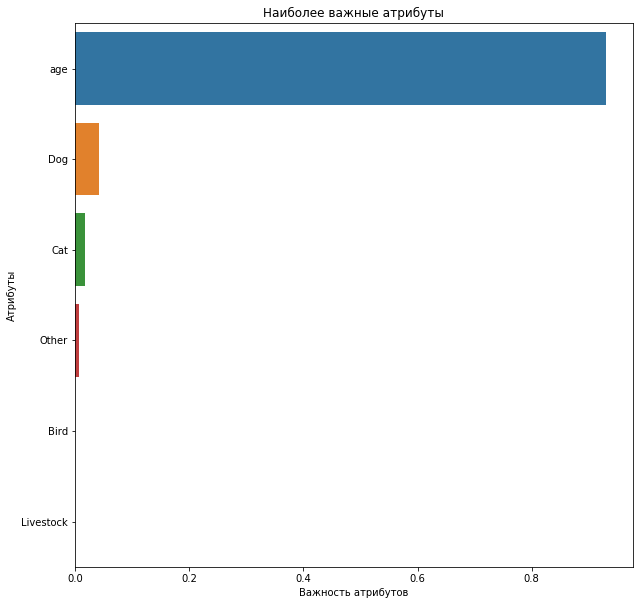

In [445]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)#влияние на модель

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [447]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

        -1.0       0.75      0.56      0.64      7040
         1.0       0.74      0.87      0.80      9922

    accuracy                           0.74     16962
   macro avg       0.75      0.72      0.72     16962
weighted avg       0.74      0.74      0.73     16962



0.7423063318004952

In [448]:
#В общем как то так.
#понимаю что по хорошему нужно все прогнать занова через оченку на тесте и т.д.
#но реально тут по факту это классификационный дата сет и тут дерево решений по факту лучшее решение и верное 
#PCA тоже можно прогнать и посмотреть как ляжет, я тут многое отрубил. PCA может быт учел к примеру пароды, цвета животных и т.д. 
#Суть я показал как бы я решал это с первого подхода.